## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [4]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [5]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [6]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [7]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [8]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [9]:
target = 'survived'

In [10]:
vars_num = [el for el in data.columns if data[el].dtypes != object and el!=target] # fill your code here

vars_cat = [el for el in data.columns if data[el].dtypes == object] # fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


### Find missing values in variables

In [11]:
# first in numerical variables

data[vars_num].isna().sum()

pclass      0
age       263
sibsp       0
parch       0
fare        1
dtype: int64

In [12]:
# now in categorical variables

# I will use isna() to find non-assigned-number values within the data,
# then .sum() to count how many of them are present

data[vars_cat].isna().sum()   

sex            0
cabin       1014
embarked       2
title          0
dtype: int64

### Determine cardinality of categorical variables

In [13]:
# I will use .nunique() to count distinct observations over a requested axis (rows by default),
# ignoring missing values.

data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Determine the distribution of numerical variables

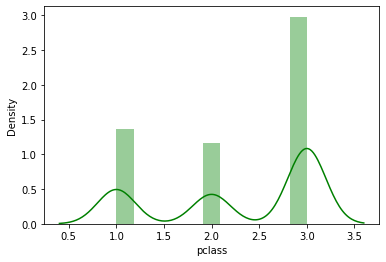

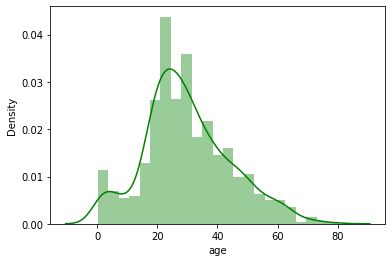

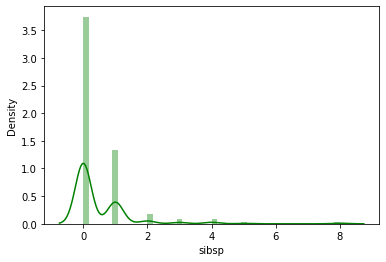

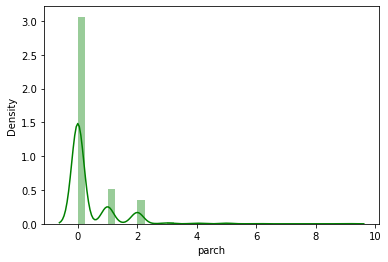

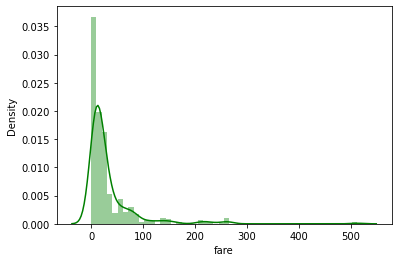

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# I will use the library Seaborn to plot the histograms and distribution functions of every numerical variable
# I will ignore Future warnins of deprecation


for el in vars_num:
    sns.distplot(data[el],color='g')
    plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [15]:
X_train, X_tests, y_train, y_tests = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_tests.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [16]:
# I will take the string of every class in Cabin and I will take only the first element for X_train and X_tests

X_train['cabin'] = X_train['cabin'].str[0]
X_tests['cabin'] = X_tests['cabin'].str[0]

X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0000,0,0,7.9250,NaN,S,Mr
44,1,female,41.0000,0,0,134.5000,E,C,Miss
1072,3,male,NaN,0,0,7.7333,NaN,Q,Mr
1130,3,female,18.0000,0,0,7.7750,NaN,S,Miss
574,2,male,29.0000,1,0,21.0000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,NaN,S,Miss
835,3,male,NaN,0,0,8.0500,NaN,S,Mr
1216,3,female,NaN,0,0,7.7333,NaN,Q,Miss
559,2,female,20.0000,0,0,36.7500,NaN,S,Miss


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [17]:
# I see in the training subsample that only two of the numerical
# variables that present missing values: 'age' and 'fare'

X_train[vars_num].isna().sum()

pclass      0
age       206
sibsp       0
parch       0
fare        1
dtype: int64

In [18]:
# I see in the testing subsample that only one of the numerical
# variables that present missing values: 'age'

X_tests[vars_num].isna().sum()

pclass     0
age       57
sibsp      0
parch      0
fare       0
dtype: int64

In [19]:
# I will create a new array for the training and testing subsamples, substituting 1 in the place where
# the NaNs are, and zero otherwise

# For the training subsample
for el in ['age', 'fare']:
    X_train[el+'_missing'] = np.where(X_train[el].isna(), 1, 0)
    X_train[el].fillna(X_train[el].median(), inplace=True)
    

# For the testing subsample
X_tests['age_missing'] = np.where(X_tests['age'].isna(), 1, 0)
X_tests['age'].fillna(X_tests['age'].median(), inplace=True)

    
X_train[['age', 'fare']].isna().sum()

age     0
fare    0
dtype: int64

In [20]:
X_tests['age'].isna().sum()

0

I see that all missing values dissapeared

### Replace Missing data in categorical variables with the string **Missing**

In [21]:
X_train[vars_cat] = X_train[vars_cat].replace(np.NaN,'Missing')
X_tests[vars_cat] = X_tests[vars_cat].replace(np.NaN,'Missing')

X_train[vars_cat].isna().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

In [22]:
X_tests[vars_cat].isna().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

Missing categorical values disapeared as well, as they were replaced by the string 'Missing'.

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [24]:
def rare_labels(dataframe, variable, threshold):
    #I will copy the dataframe into a new one
    data_frame = dataframe.copy()
    #I will group the data by the unique values and ccompute the percent of the different classes 
    data_frame = data_frame.groupby(variable)[variable].count() / len(data_frame)
    
    data_frame = data_frame[data_frame > threshold].index
    
    data_frame = np.where(dataframe[variable].isin(data_frame), dataframe[variable], 'Rare')
    
    return data_frame 


for el in vars_cat:
    X_train[el] = rare_labels(X_train, el, 0.05)
    X_tests[el] = rare_labels(X_tests, el, 0.05)

In [25]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_missing,fare_missing
1118,3,male,25.0000,0,0,7.9250,Missing,S,Mr,0,0
44,1,female,41.0000,0,0,134.5000,Rare,C,Miss,0,0
1072,3,male,28.0000,0,0,7.7333,Missing,Q,Mr,1,0
1130,3,female,18.0000,0,0,7.7750,Missing,S,Miss,0,0
574,2,male,29.0000,1,0,21.0000,Missing,S,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,Missing,S,Miss,0,0
835,3,male,28.0000,0,0,8.0500,Missing,S,Mr,1,0
1216,3,female,28.0000,0,0,7.7333,Missing,Q,Miss,1,0
559,2,female,20.0000,0,0,36.7500,Missing,S,Miss,0,0


In [26]:
X_tests

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_missing
1139,3,male,38.0,0,0,7.8958,Missing,S,Mr,0
533,2,female,21.0,0,1,21.0000,Missing,S,Miss,0
459,2,male,42.0,1,0,27.0000,Missing,S,Mr,0
1150,3,male,26.0,0,0,14.5000,Missing,S,Mr,1
393,2,male,25.0,0,0,31.5000,Missing,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
753,3,male,22.0,0,0,8.0500,Missing,S,Mr,0
1052,3,male,26.0,0,0,7.8958,Missing,S,Mr,1
426,2,male,30.0,0,0,13.0000,Missing,S,Mr,0
554,2,male,26.0,0,0,13.0000,Missing,S,Mr,0


I see there is a missmatch between the number of columns between the training and testing subsamples. Indded, the column 'fare_missing' in X_train is missing in X_tests. I will create a list with the intersection (the common columns) of the set of columns of X_train and X_tests, then I will choose them as common columns for both subsamples.

In [27]:
common_columns = np.intersect1d(X_train.columns, X_tests.columns)
X_train = X_train[common_columns]
X_tests = X_tests[common_columns]

X_train.shape, X_tests.shape

((1047, 10), (262, 10))

In [28]:
X_train.columns

Index(['age', 'age_missing', 'cabin', 'embarked', 'fare', 'parch', 'pclass',
       'sex', 'sibsp', 'title'],
      dtype='object')

In [29]:
X_tests.columns

Index(['age', 'age_missing', 'cabin', 'embarked', 'fare', 'parch', 'pclass',
       'sex', 'sibsp', 'title'],
      dtype='object')

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [30]:
for el in vars_cat:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[el], prefix=el, drop_first=True)], axis=1)
    X_tests = pd.concat([X_tests, pd.get_dummies(X_tests[el], prefix=el, drop_first=True)], axis=1)
    

X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_tests.drop(labels=vars_cat, axis=1, inplace=True)

X_train.shape, X_tests.shape

((1047, 15), (262, 15))

In [31]:
X_train.columns

Index(['age', 'age_missing', 'fare', 'parch', 'pclass', 'sibsp', 'sex_male',
       'cabin_Missing', 'cabin_Rare', 'embarked_Q', 'embarked_Rare',
       'embarked_S', 'title_Mr', 'title_Mrs', 'title_Rare'],
      dtype='object')

In [32]:
X_tests.columns

Index(['age', 'age_missing', 'fare', 'parch', 'pclass', 'sibsp', 'sex_male',
       'cabin_Missing', 'cabin_Rare', 'embarked_Q', 'embarked_S', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_Rare'],
      dtype='object')

I see again that there are columns in X_train that are not present in X_tests, for example, 'embarked_Rare', 'title_Miss', etc. I will find the common columns and re-shape the subsamples.

In [33]:
common_columns = np.intersect1d(X_train.columns, X_tests.columns)
X_train = X_train[common_columns]
X_tests = X_tests[common_columns]

X_train.shape, X_tests.shape

((1047, 14), (262, 14))

In [34]:
X_train.columns

Index(['age', 'age_missing', 'cabin_Missing', 'cabin_Rare', 'embarked_Q',
       'embarked_S', 'fare', 'parch', 'pclass', 'sex_male', 'sibsp',
       'title_Mr', 'title_Mrs', 'title_Rare'],
      dtype='object')

In [35]:
X_tests.columns

Index(['age', 'age_missing', 'cabin_Missing', 'cabin_Rare', 'embarked_Q',
       'embarked_S', 'fare', 'parch', 'pclass', 'sex_male', 'sibsp',
       'title_Mr', 'title_Mrs', 'title_Rare'],
      dtype='object')

### Scale the variables

- Use the standard scaler from Scikit-learn

In [36]:
# I will use the Standard Scaler to scale and normalize the numerical variables
sc_X = StandardScaler()
sc_X = sc_X.fit(X_train[common_columns]) 

X_train = sc_X.transform(X_train[common_columns])
X_tests = sc_X.transform(X_tests[common_columns])

In [37]:
X_train

array([[-0.37016209, -0.49492069,  0.55123545, ...,  0.86989161,
        -0.43562912, -0.27577789],
       [ 0.90402864, -0.49492069, -1.81410683, ..., -1.14956851,
        -0.43562912, -0.27577789],
       [-0.13125133,  2.02052574,  0.55123545, ...,  0.86989161,
        -0.43562912, -0.27577789],
       ...,
       [-0.13125133,  2.02052574,  0.55123545, ..., -1.14956851,
        -0.43562912, -0.27577789],
       [-0.7683467 , -0.49492069,  0.55123545, ..., -1.14956851,
        -0.43562912, -0.27577789],
       [ 0.18729636, -0.49492069,  0.55123545, ..., -1.14956851,
         2.29553067, -0.27577789]])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [44]:
model = LogisticRegression(C=0.0005, random_state=0)

model = model.fit(X_train, y_train)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [45]:
y_pred = model.predict(X_train)
print('The ROC-AUC of the training subsample is :', roc_auc_score(y_train, y_pred))
print('The accuracy of the training subsample is :', accuracy_score(y_train, y_pred))
print(' ')

y_pred = model.predict(X_tests)
print('The ROC-AUC of the testing subsample is :', roc_auc_score(y_tests, y_pred))
print('The accuracy of the testing subsample is :', accuracy_score(y_tests, y_pred))
print(' ')


The ROC-AUC of the training subsample is : 0.6266132148377125
The accuracy of the training subsample is : 0.7125119388729704
 
The ROC-AUC of the testing subsample is : 0.61
The accuracy of the testing subsample is : 0.7022900763358778
 


That's it! Well done

Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!